In [11]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [12]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [13]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [14]:
specification = specs.CoiledCoil.from_parameters

In [15]:
sequences = ['GEIAALKQEIAALKKENAALKWEIAALKQGYY', 'GEIAALKQEIAALKKENAALKWEIAALKQGYY']

In [16]:
parameters = [
    Parameter.static('Oligomeric State', 2),
    Parameter.static('Helix Length', 32),
    Parameter.dynamic('Radius', 5.0, 1.0),
    Parameter.dynamic('Pitch', 200, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['g'], 27),  
]

In [17]:
default_values = [x.default_value for x in parameters]
print(default_values)

[2, 32, 5.0, 200, 257]


In [18]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [19]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [20]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	79   	-931.101	33.2046	-992.733	-871.494
1  	66   	-963.37 	23.7462	-994.217	-924.054
2  	80   	-984.628	6.23802	-995.844	-970.805
3  	74   	-988.699	4.24713	-997.618	-981.354
4  	78   	-993.616	3.26011	-1000.47	-988.08 
5  	70   	-996.436	1.97774	-1000.47	-992.816
6  	61   	-997.721	1.47405	-1003.23	-994.956
7  	71   	-998.815	1.09211	-1003.23	-997.038
8  	64   	-999.443	0.835083	-1003.23	-998.03 
9  	59   	-999.911	0.660407	-1003.23	-998.668
10 	70   	-1000.22	0.847957	-1005.19	-999.159
11 	67   	-1000.57	1.08256 	-1005.58	-999.475
12 	63   	-1000.8 	1.36787 	-1005.58	-999.298
13 	73   	-1001.5 	1.74098 	-1005.58	-999.726
14 	68   	-1002.36	2.01777 	-1005.58	-999.948
15 	60   	-1003.4 	1.9408  	-1005.61	-1000.33
16 	62   	-1004.75	1.10232 	-1005.63	-1001.45
17 	72   	-1005.36	0.262267	-1005.64	-1004.51
18 	64   	-1005.52	0.123874	-1005.66	-1005.21
19 	77   	-1005.6 	0.0404904	-1005.69	-1005.5 
20 	64   	-1005.63	0.0257152	-1005.69	-100

In [21]:
optimized_model_ga = opt_ga.best_model

In [22]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-1005.68898864878

In [23]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [24]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

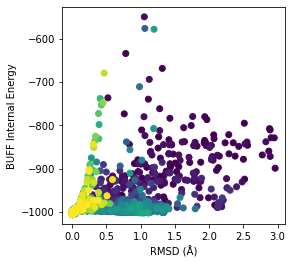

In [25]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('ga.png')

In [26]:
f = open('d_CC-Di-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [27]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [28]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-909.115	38.7745	-997.734	-823.242
1  	100  	-928.123	37.1437	-997.734	-844.864
2  	100  	-950.459	30.5363	-999.747	-854.964
3  	100  	-966.09 	22.9069	-999.747	-907.576
4  	100  	-975.67 	15.8022	-999.997	-924.463
5  	100  	-982.819	10.3557	-1001.53	-950.217
6  	100  	-987.807	7.73272	-1001.53	-959.808
7  	100  	-991.235	5.3415 	-1001.53	-978.228
8  	100  	-993.379	4.24432	-1001.53	-980.42 
9  	100  	-995.019	3.577  	-1003.25	-984.949
10 	100  	-996.283	3.28941	-1003.34	-986.609
11 	100  	-997.727	2.57707	-1003.34	-992.143
12 	100  	-998.449	2.28198	-1003.34	-992.471
13 	100  	-999.178	1.96985	-1003.34	-994.953
14 	100  	-999.642	1.6601 	-1003.34	-995.541
15 	100  	-1000.07	1.51512	-1003.34	-995.953
16 	100  	-1000.55	1.30382	-1003.34	-996.452
17 	100  	-1001.01	1.07477	-1003.34	-997.992
18 	100  	-1001.34	0.979218	-1003.49	-997.992
19 	100  	-1001.76	0.82474 	-1005.58	-999.608
20 	100  	-1002.09	0.88427 	-1005.6 	-1000.41
21 	100

In [29]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-1006.0797704054789

In [30]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [31]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

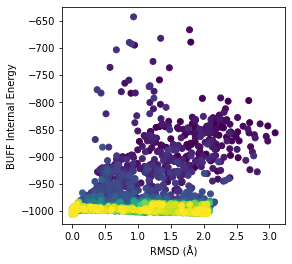

In [32]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('de.png')

In [33]:
f = open('d_CC-Di-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [34]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [35]:
opt_pso.run_opt(100, 30, cores=8)

gen	evals	avg     	std  	min     	max     
0  	100  	-898.452	105.9	-1002.56	-114.007
1  	78   	-921.112	113.181	-1008.61	-114.007
2  	26   	-932.558	71.6725	-1008.61	-482.804
3  	68   	-917.304	51.2738	-1008.61	-726.479
4  	86   	-920.434	43.921 	-1004.55	-726.479
5  	85   	-916.783	113.079	-1005.86	-268.073
6  	53   	-905.844	124.131	-1005.86	-268.073
7  	73   	-910.72 	105.101	-1005.86	-268.073
8  	92   	-919.196	44.3832	-1003.12	-784.911
9  	84   	-939.201	62.3946	-1006.82	-588.336
10 	46   	-915.997	111.039	-1006.82	-449.653
11 	16   	-902.138	114.494	-1006.82	-449.653
12 	41   	-916.339	88.3874	-1006.82	-497.653
13 	72   	-926.004	83.3485	-1002.71	-497.653
14 	61   	-920.513	117.409	-1006.32	-61.8364
15 	42   	-922.924	116.376	-1006.32	-61.8364
16 	58   	-916.028	121.356	-1006.32	-61.8364
17 	67   	-919.69 	107.71 	-1003.84	-259.967
18 	67   	-926.883	101.819	-1003.84	-259.967
19 	72   	-933.548	77.5624	-1005.52	-364.572
20 	76   	-922.384	79.0504	-1005.52	-364.572
21 	71   	-905

In [36]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-1008.6125647828703

In [37]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [38]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

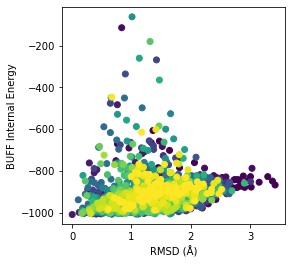

In [39]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('pso.png')

In [40]:
f = open('d_CC-Di-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [41]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [42]:
opt_cmaes.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-897.554	40.8803	-979.783	-711.258
1  	100  	-922.014	57.395 	-999.983	-568.682
2  	100  	-937.325	56.5024	-998.776	-679.834
3  	100  	-979.451	14.1145	-1001.95	-924.979
4  	100  	-986.198	23.8062	-1002.3 	-759.656
5  	100  	-992.419	6.1044 	-1003.23	-976.096
6  	100  	-995.091	4.87187	-1002.41	-983.182
7  	100  	-998.071	3.03217	-1002.43	-986.746
8  	100  	-999.923	2.68098	-1003.02	-984.282
9  	100  	-1001.26	1.87668	-1003.15	-985.416
10 	100  	-1001.7 	1.1737 	-1003.66	-998.754
11 	100  	-1002.3 	0.938891	-1003.59	-999.655
12 	100  	-1002.74	0.721928	-1003.63	-999.438
13 	100  	-1002.76	1.03593 	-1003.75	-999.622
14 	100  	-1002.8 	1.25814 	-1003.77	-999.811
15 	100  	-1003.03	1.19687 	-1003.86	-999.885
16 	100  	-1002.8 	1.5035  	-1003.82	-999.786
17 	100  	-1003.29	1.11294 	-1003.85	-999.907
18 	100  	-1003.42	1.02318 	-1003.89	-999.853
19 	100  	-1002.86	1.5788  	-1003.86	-999.925
20 	100  	-1002.91	1.56218 	-1003.86	-999.888


In [43]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-1003.9025419323948

In [44]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [45]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

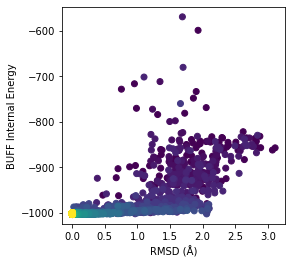

In [46]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('cmaes.png')

In [47]:
f = open('d_CC-Di-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)